In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
! cp drive/MyDrive/IR_Assignment/IR_A2_data.txt .

**Importing necessary libraries** 

In [13]:
from math import log2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

**Reading the data**

In [40]:
# Define the column names
column_names = ["relevance_score", "query_id"]
column_names += [f"feature_{i}" for i in range(1, 137)]

# Read the data and parse the fields for qid:4
with open("IR_A2_data.txt", "r") as f:
    rows = []
    for line in f:
        # Split the line into fields
        fields = line.strip().split()

        # Parse the fields for qid:4
        query_id = int(fields[1].split(":")[1])
        if query_id == 4:
            relevance_score = float(fields[0])
            features = [float(x.split(":")[1]) for x in fields[2:138]]
            rows.append([relevance_score, query_id] + features)

# Create the DataFrame
data = pd.DataFrame(rows, columns=column_names)

In [41]:
data

,relevance_score,query_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136
0,0.0,4,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,27.0,2.0,9.0,124.0,4678.0,54.0,74.0,0.0,0.0,0.000000
1,0.0,4,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,61.0,0.0,8.0,122.0,508.0,131.0,136.0,0.0,0.0,0.000000
2,0.0,4,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,31.0,2.0,8.0,115.0,508.0,51.0,70.0,0.0,0.0,0.000000
3,0.0,4,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,32.0,82.0,17.0,122.0,508.0,83.0,107.0,0.0,10.0,13.350000
4,1.0,4,3.0,0.0,3.0,0.0,3.0,1.000000,0.0,1.000000,...,29.0,11.0,8.0,121.0,508.0,103.0,120.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.0,4,3.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.666667,...,62.0,35.0,1.0,153.0,4872.0,9.0,55.0,0.0,0.0,0.000000
99,1.0,4,3.0,0.0,3.0,2.0,3.0,1.000000,0.0,1.000000,...,52.0,367.0,6.0,153.0,2383.0,18.0,99.0,0.0,16.0,11.316667
100,2.0,4,2.0,0.0,2.0,0.0,2.0,0.666667,0.0,0.666667,...,28.0,0.0,0.0,49182.0,26966.0,15.0,69.0,0.0,193.0,21.935560
101,1.0,4,2.0,0.0,2.0,0.0,2.0,0.666667,0.0,0.666667,...,23.0,0.0,1.0,42877.0,26562.0,12.0,24.0,0.0,56.0,62.920604


# Objective 1

The first objective is to create a file that rearranges the query-url pairs in order of the maximum
DCG (discounted cumulative gain). The number of such files that could be made should also be
stated.

In [42]:
# Sort the data by relevance score in descending order
data_sorted = data.sort_values(by=['relevance_score'], ascending=False)
data_sorted

,relevance_score,query_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136
7,3.0,4,3.0,0.0,2.0,1.0,3.0,1.000000,0.000000,0.666667,...,32.0,349.0,8.0,123.0,281.0,22.0,6.0,0.0,0.0,0.000000
76,2.0,4,2.0,0.0,1.0,0.0,2.0,0.666667,0.000000,0.333333,...,19.0,0.0,0.0,2417.0,721.0,14.0,113.0,0.0,13.0,47.900000
40,2.0,4,3.0,2.0,2.0,0.0,3.0,1.000000,0.666667,0.666667,...,33.0,8.0,3.0,1888.0,9338.0,3.0,11.0,0.0,0.0,0.000000
36,2.0,4,3.0,0.0,2.0,0.0,3.0,1.000000,0.000000,0.666667,...,17.0,0.0,2.0,12028.0,11379.0,26.0,24.0,0.0,77.0,23.959522
90,2.0,4,3.0,0.0,3.0,3.0,3.0,1.000000,0.000000,1.000000,...,67.0,27.0,0.0,814.0,13555.0,108.0,113.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,0.0,4,2.0,0.0,0.0,0.0,2.0,0.666667,0.000000,0.000000,...,41.0,8.0,0.0,868.0,9260.0,246.0,88.0,0.0,0.0,0.000000
43,0.0,4,2.0,0.0,0.0,0.0,2.0,0.666667,0.000000,0.000000,...,38.0,4.0,0.0,797.0,9260.0,237.0,80.0,0.0,0.0,0.000000
42,0.0,4,3.0,0.0,3.0,1.0,3.0,1.000000,0.000000,1.000000,...,65.0,83.0,5.0,144.0,262.0,157.0,179.0,0.0,0.0,0.000000
41,0.0,4,3.0,1.0,3.0,2.0,3.0,1.000000,0.333333,1.000000,...,65.0,195.0,8.0,124.0,206.0,103.0,121.0,0.0,0.0,0.000000


In [43]:
num4 = (data['relevance_score'] == 4).sum()
num3 = (data['relevance_score'] == 3).sum()
num2 = (data['relevance_score'] == 2).sum()
num1 = (data['relevance_score'] == 1).sum()
num0 = (data['relevance_score'] == 0).sum()
num_files = math.factorial(num0)*math.factorial(num1)*math.factorial(num2)*math.factorial(num3)*math.factorial(num4)

print(f"Number of possible files: {num_files:.2e}")
print("Number of possible files: ", num_files)

Number of possible files: 1.99e+121
Number of possible files:  19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


In [44]:
#write to the csv file
data_sorted.to_csv('dcg_ranked_data.csv', index=False)

# Objective 2

Compute the nDCG (normalized discounted cumulative gain) for the dataset. This involves
calculating nDCG at position 50 and for the entire dataset.

In [51]:
# create list of relevance scores
relevance_scores = data_sorted['relevance_score'].values

# create array of ideal relevance scores
ideal_scores = -np.sort(-relevance_scores)
ideal_scores[ideal_scores == 0] = 1

# function to calculate ndcg at k
def ndcg_at_k(k, rel_scores):
    dcg = rel_scores[0] + np.sum(rel_scores[1:k] / np.log2(np.arange(2, k+1)))
    idcg = ideal_scores[0] + np.sum(ideal_scores[1:k] / np.log2(np.arange(2, k+1)))
    return dcg / idcg

# calculate ndcg at position 50
ndcg_at_50 = ndcg_at_k(50, relevance_scores)

# calculate ndcg for entire dataset
ndcg = ndcg_at_k(len(relevance_scores), relevance_scores)

print("nDCG@50:", ndcg_at_50)
print("nDCG:", ndcg)

nDCG@50: 0.9511719240819084
nDCG: 0.6863004936659748


# Objective 3

Assume a model that ranks URLs based on the value of feature 75,
which represents the sum of TF-IDF on the whole document. URLs with higher feature 75
values are considered more relevant. Any non-zero relevance judgement value is considered
relevant. Using this model, plot a Precision-Recall curve for the query "qid:4".
The curve should help visualize the trade-off between precision and recall as the model's
threshold for relevance is adjusted.

In [52]:
data_sorted_75 = data.sort_values(by=['feature_75'], ascending=False)
data_sorted_75

,relevance_score,query_id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136
8,0.0,4,3.0,0.0,3.0,0.0,3.0,1.000000,0.000000,1.000000,...,51.0,766.0,0.0,119.0,32560.0,45.0,24.0,0.0,0.0,0.000000
67,0.0,4,3.0,0.0,3.0,2.0,3.0,1.000000,0.000000,1.000000,...,61.0,0.0,9.0,120.0,392.0,162.0,169.0,0.0,0.0,0.000000
56,0.0,4,3.0,1.0,3.0,1.0,3.0,1.000000,0.333333,1.000000,...,48.0,189.0,8.0,549.0,2650.0,91.0,114.0,0.0,0.0,0.000000
1,0.0,4,3.0,0.0,3.0,0.0,3.0,1.000000,0.000000,1.000000,...,61.0,0.0,8.0,122.0,508.0,131.0,136.0,0.0,0.0,0.000000
101,1.0,4,2.0,0.0,2.0,0.0,2.0,0.666667,0.000000,0.666667,...,23.0,0.0,1.0,42877.0,26562.0,12.0,24.0,0.0,56.0,62.920604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.0,4,2.0,0.0,0.0,0.0,2.0,0.666667,0.000000,0.000000,...,19.0,0.0,2.0,59949.0,22708.0,5.0,6.0,0.0,391.0,28.267114
16,0.0,4,3.0,0.0,0.0,0.0,3.0,1.000000,0.000000,0.000000,...,48.0,2.0,2.0,144.0,1917.0,19.0,119.0,0.0,0.0,0.000000
86,0.0,4,3.0,0.0,0.0,0.0,3.0,1.000000,0.000000,0.000000,...,34.0,43.0,2.0,3262.0,1859.0,20.0,165.0,0.0,0.0,0.000000
49,0.0,4,1.0,0.0,1.0,0.0,1.0,0.333333,0.000000,0.333333,...,24.0,11.0,0.0,9040.0,8756.0,51.0,17.0,0.0,10.0,20.133333


In [58]:
def calc_precision_recall(data):
    num_relevant = (data['relevance_score'] > 0).sum()
    num_docs = data.shape[0]
    precisions = []
    recalls = []
    tp = 0
    fp = 0
    for i in range(num_docs):
        if data.iloc[i]['relevance_score'] > 0:
            tp += 1
        else:
            fp += 1
        precisions.append(tp / (tp + fp))
        recalls.append(tp / num_relevant)
    return precisions, recalls

precision, recall = calc_precision_recall(data_sorted_75)

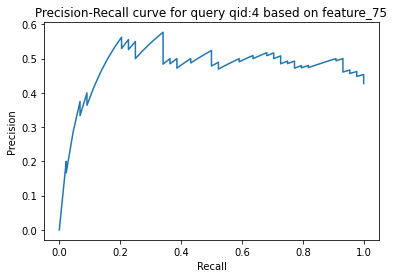

In [60]:
# plot Precision-Recall curve
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve for query qid:4 based on feature_75")
plt.show()